In [1]:
import pandas as pd
from bertopic import BERTopic
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from hdbscan import HDBSCAN
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

/Users/a82108/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/a82108/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
converged_patents_period1 = pd.read_csv('/Users/a82108/Documents/Yonsei/3-1/데마/ISL FT,AT,AI/GATNE_revision1_server용/data/BerTopic Data/converged_patents_period1.csv', encoding='cp949')
converged_patents_period2 = pd.read_csv('/Users/a82108/Documents/Yonsei/3-1/데마/ISL FT,AT,AI/GATNE_revision1_server용/data/BerTopic Data/converged_patents_period2.csv', encoding='cp949')
converged_patents_period3 = pd.read_csv('/Users/a82108/Documents/Yonsei/3-1/데마/ISL FT,AT,AI/GATNE_revision1_server용/data/BerTopic Data/converged_patents_period3.csv', encoding='cp949')
converged_patents_period4 = pd.read_csv('/Users/a82108/Documents/Yonsei/3-1/데마/ISL FT,AT,AI/GATNE_revision1_server용/data/BerTopic Data/converged_patents_period4.csv', encoding='cp949')
converged_patents_period5 = pd.read_csv('/Users/a82108/Documents/Yonsei/3-1/데마/ISL FT,AT,AI/GATNE_revision1_server용/data/BerTopic Data/converged_patents_period5.csv', encoding='cp949')

converged_patents_period1 = converged_patents_period1[['등록번호', '등록일', 'Original IPC Main', '요약']]
converged_patents_period2 = converged_patents_period2[['등록번호', '등록일', 'Original IPC All', '요약']]
converged_patents_period3 = converged_patents_period3[['등록번호', '등록일', 'Original IPC All', '요약']]
converged_patents_period4 = converged_patents_period4[['등록번호', '등록일', 'Original IPC All', '요약']]
converged_patents_period5 = converged_patents_period5[['등록번호', '등록일', 'Original IPC All', '요약']]

In [3]:
converged_patents_period5

,등록번호,등록일,Original IPC All,요약
0,12179283,2024-12-31,B23K-026/03 | B23K-026/12 | B23K-026/14 | B23K...,A method for evaluating a laser cut edge of a ...
1,12183469,2024-12-31,G16H-050/80 | A61B-005/00 | A61B-005/1455 | G0...,A user score of a test for assessing a risk of...
2,12176084,2024-12-24,G16H-015/00 | A61B-005/00 | A61B-005/16 | G06Q...,A method includes receiving data representing ...
3,12176102,2024-12-24,A61B-005/20 | A61B-005/00 | A61B-005/0205 | A6...,Systems and methods are disclosed that facilit...
4,12167940,2024-12-17,A61B-090/00 | A61B-005/00 | A61B-005/055 | A61...,Methods and systems for performing computer-as...
...,...,...,...,...
643,10892907,2021-01-12,H04L-012/28 | G06F-003/0484 | G06F-003/0488 | ...,A home automation (HA) system may include a cl...
644,10881348,2021-01-05,G09B-025/00 | G09B-019/00 | A61B-005/00 | G06N...,Systems and methods for measuring biologically...
645,10885083,2021-01-05,G06F-016/335 | G06N-005/02 | G06N-020/00 | A61...,"Systems, methods, and devices for automated pr..."
646,10885361,2021-01-05,G06K-009/00 | G06F-021/32 | H04L-029/06 | G06N...,Method for identifying a person through an ele...


In [4]:
converged_patents_all = pd.concat([converged_patents_period1, converged_patents_period2, converged_patents_period3, converged_patents_period4, converged_patents_period5])

In [5]:
converged_patents_all

,등록번호,등록일,Original IPC Main,요약,Original IPC All
0,6980673,12/27/05,G06K-009/00,"In a fingerprint identification system, a fing...",NaN
1,6975973,12/13/05,G06F-017/50,The method relates to analysis of a tubular st...,NaN
2,6972775,12/6/05,G09G-005/00,A method of displaying an image of at least a ...,NaN
3,6973203,12/6/05,G06K-009/00,"A transaction method, a service center, and a ...",NaN
4,6957187,10/18/05,G06F-017/60,A system for aiding to make a medical care sch...,NaN
...,...,...,...,...,...
643,10892907,2021-01-12,NaN,A home automation (HA) system may include a cl...,H04L-012/28 | G06F-003/0484 | G06F-003/0488 | ...
644,10881348,2021-01-05,NaN,Systems and methods for measuring biologically...,G09B-025/00 | G09B-019/00 | A61B-005/00 | G06N...
645,10885083,2021-01-05,NaN,"Systems, methods, and devices for automated pr...",G06F-016/335 | G06N-005/02 | G06N-020/00 | A61...
646,10885361,2021-01-05,NaN,Method for identifying a person through an ele...,G06K-009/00 | G06F-021/32 | H04L-029/06 | G06N...


In [6]:
import re

# 수술 관련 키워드 리스트 (필요 시 추가 가능)
surgery_keywords = [
    "surgery", "surgical", "surgeon",
    "laparoscopic", "endoscopic", "resection", "transplant", "implantation", "medicine"
]

converged_patents_all['요약'] = converged_patents_all['요약'].str.replace(r'\bimages\b', 'image', flags=re.IGNORECASE, regex=True)

# 정규표현식 패턴 (대소문자 구분 없이 검색)
pattern = r"\b(" + "|".join(surgery_keywords) + r")\b"

# 수술 관련 용어가 포함되지 않은 행만 남기기
converged_patents_all = converged_patents_all[~converged_patents_all['요약'].str.contains(pattern, flags=re.IGNORECASE, na=False)]

# 결과 확인
print(converged_patents_all.shape)

(2136, 5)


In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1) 소문자 변환
    text = text.lower()
    # 2) 기호/숫자 제거
    text = re.sub(r'[^a-z\s]', ' ', text)
    # 3) 불용어 제거 + 짧은 단어 제거
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return ' '.join(words)

converged_patents_all['cleaned_summary'] = converged_patents_all['요약'].astype(str).apply(clean_text)
texts = converged_patents_all['cleaned_summary'].tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a82108/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
converged_patents_all

,등록번호,등록일,Original IPC Main,요약,Original IPC All,cleaned_summary
0,6980673,12/27/05,G06K-009/00,"In a fingerprint identification system, a fing...",NaN,fingerprint identification system fingerprint ...
1,6975973,12/13/05,G06F-017/50,The method relates to analysis of a tubular st...,NaN,method relates analysis tubular structure rend...
2,6972775,12/6/05,G09G-005/00,A method of displaying an image of at least a ...,NaN,method displaying image least portion virtual ...
3,6973203,12/6/05,G06K-009/00,"A transaction method, a service center, and a ...",NaN,transaction method service center device carry...
4,6957187,10/18/05,G06F-017/60,A system for aiding to make a medical care sch...,NaN,system aiding make medical care schedule provi...
...,...,...,...,...,...,...
643,10892907,2021-01-12,NaN,A home automation (HA) system may include a cl...,H04L-012/28 | G06F-003/0484 | G06F-003/0488 | ...,home automation system may include cloud serve...
644,10881348,2021-01-05,NaN,Systems and methods for measuring biologically...,G09B-025/00 | G09B-019/00 | A61B-005/00 | G06N...,systems methods measuring biologically behavio...
645,10885083,2021-01-05,NaN,"Systems, methods, and devices for automated pr...",G06F-016/335 | G06N-005/02 | G06N-020/00 | A61...,systems methods devices automated provisioning...
646,10885361,2021-01-05,NaN,Method for identifying a person through an ele...,G06K-009/00 | G06F-021/32 | H04L-029/06 | G06N...,method identifying person electrocardiogram ec...


In [9]:
# 데이터 불러오기
converged_patents_all['등록일'] = pd.to_datetime(converged_patents_all['등록일'])

# 커스텀 구간
bins = [pd.Timestamp('2001-01-01'), pd.Timestamp('2006-01-01'),
        pd.Timestamp('2011-01-01'), pd.Timestamp('2016-01-01'),
        pd.Timestamp('2021-01-01'), pd.Timestamp('2025-01-01')]
labels = ["2001-2005", "2006-2010", "2011-2015", "2016-2020", "2021-2025"]

# 구간 라벨링
converged_patents_all['기간'] = pd.cut(converged_patents_all['등록일'], bins=bins, labels=labels, right=False)

# 구간 중앙값(중간 날짜)로 변환
label_to_date = {
    "2001-2005": pd.Timestamp("2003-07-01"),
    "2006-2010": pd.Timestamp("2008-07-01"),
    "2011-2015": pd.Timestamp("2013-07-01"),
    "2016-2020": pd.Timestamp("2018-07-01"),
    "2021-2025": pd.Timestamp("2022-07-01")
}
timestamps = converged_patents_all['기간'].map(label_to_date).tolist()

umap_model = UMAP(n_neighbors=8, n_components=8, random_state=43)
hdbscan_model = HDBSCAN(min_cluster_size=25, metric='euclidean', cluster_selection_method='eom')
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")  # 바이그램 추가

topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    top_n_words=8,
    nr_topics=10
#    random_state=42
)

# BERTopic 학습
#topic_model = BERTopic(verbose=True, top_n_words=20)
topics, probs = topic_model.fit_transform(texts)

# 1) 기존 결과
topics_over_time = topic_model.topics_over_time(
    texts, timestamps,
    global_tuning=True,
    evolution_tuning=True,
    nr_bins=None
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [10]:
# 전체 토픽 키워드 추출
all_topics = topic_model.get_topics()

# 토픽별로 상위 N개 키워드만 추출
top_n = 10  # 원하는 만큼 조절
topic_keywords = {}
for topic_num, keywords in all_topics.items():

    top_words = [word for word, _ in keywords[:top_n]]
    topic_keywords[f"Topic {topic_num}"] = top_words

# 길이가 맞도록 패딩
max_len = max(len(words) for words in topic_keywords.values())
for k in topic_keywords:
    while len(topic_keywords[k]) < max_len:
        topic_keywords[k].append("")

# DataFrame 생성 (토픽이 컬럼, 키워드가 행)
df_pivot = pd.DataFrame(topic_keywords)
df_pivot.index = [f"Rank {i+1}" for i in range(max_len)]

# 결과 출력
print(df_pivot)

           Topic -1         Topic 0        Topic 1   Topic 2         Topic 3  \
Rank 1         data         patient          image    signal       biometric   
Rank 2         user         medical        medical    method     fingerprint   
Rank 3       device            data        display    motion  authentication   
Rank 4  information          device    information     heart          device   
Rank 5       method     information  medical image  activity            user   
Rank 6     includes  medical device           data   signals          sensor   
Rank 7        based          health           unit      time           light   
Rank 8      patient            care            eye    device            data   

           Topic 4          Topic 5         Topic 6         Topic 7  \
Rank 1       brain        emotional            skin         vehicle   
Rank 2     subject          emotion           image          driver   
Rank 3      signal            state           color         contro

In [11]:
# 예: 토픽 0의 키워드 추출
topic_keywords = topic_model.get_topic(0)  # [(단어, 점수), (단어, 점수), ...]

# 점수만 추출
scores = [score for _, score in topic_keywords]
total_score = sum(scores)

# 비율(%)로 변환
keywords_with_pct = [(word, (score / total_score) * 100) for word, score in topic_keywords]

# 보기 좋게 DataFrame으로
import pandas as pd
df_keywords = pd.DataFrame(keywords_with_pct, columns=["Keyword", "Percentage"])
print(df_keywords)

          Keyword  Percentage
0         patient   18.696060
1         medical   17.322106
2            data   15.767323
3          device   14.861923
4     information   10.135173
5  medical device    8.303393
6          health    7.587122
7            care    7.326900


In [12]:
topic_model.visualize_topics_over_time(topics_over_time)

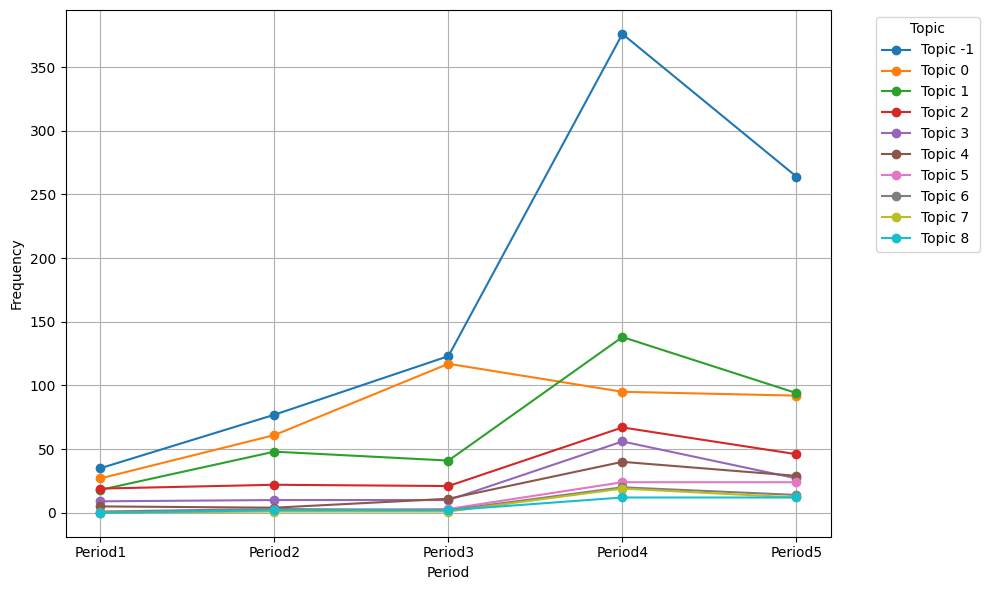

In [13]:
# 2) Period 레이블 매핑
def label_period(date):
    if date < pd.Timestamp("2006-01-01"):
        return "Period1"
    elif date < pd.Timestamp("2011-01-01"):
        return "Period2"
    elif date < pd.Timestamp("2016-01-01"):
        return "Period3"
    elif date < pd.Timestamp("2021-01-01"):
        return "Period4"
    else:
        return "Period5"

topics_over_time["Period"] = topics_over_time["Timestamp"].apply(label_period)

# 3) Period별 평균 Frequency
period_topics = topics_over_time.groupby(['Period', 'Topic']).agg({'Frequency':'mean'}).reset_index()

# 상위 N개 토픽만 필터링 (안하면 너무 복잡)
top_n = 10
top_topics = period_topics.groupby("Topic")["Frequency"].mean().nlargest(top_n).index
plot_data = period_topics[period_topics["Topic"].isin(top_topics)]

# 피벗: Period x Topic 테이블
pivot_data = plot_data.pivot(index="Period", columns="Topic", values="Frequency").fillna(0)

# 라인 그래프 그리기
plt.figure(figsize=(10,6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], marker='o', label=f"Topic {col}")

#plt.title("Period별 토픽 변화 추세", fontsize=14)
plt.xlabel("Period")
plt.ylabel("Frequency")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
fig = topic_model.visualize_topics_over_time(topics_over_time)
fig.update_xaxes(
    tickvals=topics_over_time['Timestamp'].unique(),
    ticktext=topics_over_time['Period'].unique()
)
# 모든 trace에 점 추가
for trace in fig.data:
    trace.mode = 'lines+markers'
fig.show()

In [15]:
# 비율 계산
topics_over_time['Frequency'] = topics_over_time['Frequency'] / topics_over_time.groupby('Timestamp')['Frequency'].transform('sum') * 100

# 시각화
fig = topic_model.visualize_topics_over_time(topics_over_time)

# X축 라벨 변경
fig.update_xaxes(
    tickvals=topics_over_time['Timestamp'].unique(),
    ticktext=topics_over_time['Period'].unique()
)

# Y축 이름 변경
fig.update_yaxes(title_text="Topic Share (%)")

# 모든 trace에 점 추가
for trace in fig.data:
    trace.mode = 'lines+markers'

fig.show()

In [16]:
import pandas as pd
import numpy as np

# ----- 1. IPC 조합 정의 -----
ipc_combinations = [
    ["G06Q-020", "A61F-009", "G06F-009"],
    ["G06Q-050", "A61F-009", "G06Q-010"],
    ["G06Q-050", "A61F-009", "G06F-009"],
    ["G06Q-030", "A61F-009", "G06F-009"],
    ["G06F-017", "A61M-001", "G06F-009"],
    ["G06Q-040", "A61M-001", "G06N-005"],
    ["G06F-003", "A61B-018", "G06F-009"],
    ["G06Q-040", "A61M-001", "G06Q-010"],
    ["G06F-021", "A61B-018", "G06F-009"],
    ["G06F-021", "A61B-018", "G06Q-010"],
    # ---- 새로 추가된 조합 ----
    ["G06F-003", "A61B-018", "G06Q-010"],
    ["G06Q-010", "A61B-018", "G06F-009"],
    ["G06F-003", "A61B-017", "G06F-009"],
    ["G06Q-040", "A61B-005", "G06T-007"],
    ["G06F-021", "A61B-017", "G06F-009"],
    ["G06F-017", "A61M-005", "G06F-009"],
    ["G06Q-010", "A61N-001", "G06N-005"],
    ["G06F-021", "A61B-017", "A61B-005"],
    ["G06F-003", "A61B-017", "G06Q-010"],
    ["G06F-021", "A61B-017", "G06Q-010"],
]

# ----- 2. IPC 매칭 함수 (여러 조합 허용) -----
def match_combinations(ipc_string, combinations):
    if pd.isna(ipc_string):
        return []
    ipc_list = [x.strip().split("/")[0] for x in ipc_string.split("|")]
    matched = []
    for idx, combo in enumerate(combinations):
        if all(code in ipc_list for code in combo):
            matched.append(idx)
    return matched

# ----- 3. 원본 토픽 매핑 (등록번호 → 토픽) -----
# topics: BERTopic 결과 리스트
topic_map = dict(zip(converged_patents_all['등록번호'], topics))

# ----- 4. 2021~2024 특허 필터링 -----
df_filtered = converged_patents_all[
    converged_patents_all['등록일'].between("2021-01-01", "2024-12-31")
].copy()

# ----- 5. 매칭된 조합 추가 -----
df_filtered['Matched_Combinations'] = df_filtered['Original IPC All'].apply(
    lambda x: match_combinations(str(x), ipc_combinations)
)
df_filtered = df_filtered[df_filtered['Matched_Combinations'].map(len) > 0]

# ----- 6. 행 확장 (중복 카운트) -----
df_expanded = df_filtered.explode('Matched_Combinations').reset_index(drop=True)

# ----- 7. 토픽 매칭 (등록번호 기반, 안전하게) -----
df_expanded['Topic'] = df_expanded['등록번호'].map(topic_map)

# ----- 8. 조합 × 토픽 분포 -----
count_table = df_expanded.groupby(['Matched_Combinations', 'Topic']).size().unstack(fill_value=0)
print("\n[조합 × 토픽 분포표]")
print(count_table)

# ----- 9. 토픽별 상위 키워드 -----
topic_keywords = {t: topic_model.get_topic(t) for t in topic_model.get_topics().keys()}
print("\n[토픽별 상위 키워드]")
for t, words in topic_keywords.items():
    print(f"Topic {t}: {[w[0] for w in words[:5]]}")

# ----- 10. 조합별 대표 특허 샘플 (각 조합 3개) -----
sample_patents = df_expanded.groupby('Matched_Combinations').head(3)[
    ['등록번호', '등록일', 'Original IPC All', '요약', 'Topic']
]
print("\n[조합별 대표 특허 샘플]")
print(sample_patents)


[조합 × 토픽 분포표]
Topic                 -1   0   1   5   6
Matched_Combinations                    
0                      0   1   0   0   0
1                      1   0   0   0   0
2                      0   1   0   0   0
3                      0   1   0   0   0
4                      1   0   0   0   0
5                      0   1   0   0   0
7                      1   0   0   0   0
12                     0   1   0   0   0
13                     0   0   1   0   1
15                     1   0   0   0   0
16                     0   0   0   1   0
17                     2   0   1   0   0
18                     0   1   0   0   0

[토픽별 상위 키워드]
Topic -1: ['data', 'user', 'device', 'information', 'method']
Topic 0: ['patient', 'medical', 'data', 'device', 'information']
Topic 1: ['image', 'medical', 'display', 'information', 'medical image']
Topic 2: ['signal', 'method', 'motion', 'heart', 'activity']
Topic 3: ['biometric', 'fingerprint', 'authentication', 'device', 'user']
Topic 4: ['brain', 's

In [17]:
import pandas as pd
import numpy as np

# ----- 1. IPC 조합 정의 -----
ipc_combinations = [
    ["G06Q-030", "A61M-005", "A61B-005"],
    ["G06F-021", "A61F-002", "G06T-007"],
    ["G06Q-010", "A61M-001", "G06N-020"],
    ["G06F-021", "A61B-018", "G06N-020"],
    ["G06Q-040", "A61F-002", "G06T-007"],
    ["G06Q-020", "A61F-002", "G06N-005"],
    ["G06Q-050", "A61F-002", "G06N-005"],
    ["G06Q-050", "A61F-002", "G06T-007"],
    ["G06Q-010", "A61B-018", "G06N-020"],
    ["G06Q-010", "A61N-001", "G06N-020"],
    ["G06F-017", "A61N-001", "G06N-007"],
    ["G06Q-040", "A61N-001", "G06N-007"],
    ["G06F-003", "A61N-001", "G06N-007"],
    ["G06Q-050", "A61N-001", "G06N-007"],
    ["G06Q-030", "A61M-001", "G06N-020"],
    ["G06Q-010", "A61M-005", "G06T-007"],
    ["G06Q-040", "A61M-005", "A61B-005"],
    ["G06F-003", "A61B-018", "G06N-020"],
    ["G06K-007", "A61M-005", "G06Q-010"],
    ["G06Q-030", "A61F-002", "G06N-005"],
]

# ----- 2. IPC 매칭 함수 (여러 조합 허용) -----
def match_combinations(ipc_string, combinations):
    if pd.isna(ipc_string):
        return []
    ipc_list = [x.strip().split("/")[0] for x in ipc_string.split("|")]
    matched = []
    for idx, combo in enumerate(combinations):
        if all(code in ipc_list for code in combo):
            matched.append(idx)
    return matched

# ----- 3. 원본 토픽 매핑 (등록번호 → 토픽) -----
# topics: BERTopic 결과 리스트
topic_map = dict(zip(converged_patents_all['등록번호'], topics))

# ----- 4. 2021~2024 특허 필터링 -----
df_filtered = converged_patents_all[
    converged_patents_all['등록일'].between("2021-01-01", "2024-12-31")
].copy()

# ----- 5. 매칭된 조합 추가 -----
df_filtered['Matched_Combinations'] = df_filtered['Original IPC All'].apply(
    lambda x: match_combinations(str(x), ipc_combinations)
)
df_filtered = df_filtered[df_filtered['Matched_Combinations'].map(len) > 0]

# ----- 6. 행 확장 (중복 카운트) -----
df_expanded = df_filtered.explode('Matched_Combinations').reset_index(drop=True)

# ----- 7. 토픽 매칭 (등록번호 기반, 안전하게) -----
df_expanded['Topic'] = df_expanded['등록번호'].map(topic_map)

# ----- 8. 조합 × 토픽 분포 -----
count_table = df_expanded.groupby(['Matched_Combinations', 'Topic']).size().unstack(fill_value=0)
print("\n[조합 × 토픽 분포표]")
print(count_table)

# ----- 9. 토픽별 상위 키워드 -----
topic_keywords = {t: topic_model.get_topic(t) for t in topic_model.get_topics().keys()}
print("\n[토픽별 상위 키워드]")
for t, words in topic_keywords.items():
    print(f"Topic {t}: {[w[0] for w in words[:5]]}")

# ----- 10. 조합별 대표 특허 샘플 (각 조합 3개) -----
sample_patents = df_expanded.groupby('Matched_Combinations').head(3)[
    ['등록번호', '등록일', 'Original IPC All', '요약', 'Topic']
]
print("\n[조합별 대표 특허 샘플]")
print(sample_patents)


[조합 × 토픽 분포표]
Topic                 -1   0   1   5
Matched_Combinations                
0                      2   1   0   0
1                      1   0   0   0
2                      0   1   0   0
4                      1   0   0   0
5                      1   0   0   0
6                      1   0   0   0
7                      1   0   0   0
9                      1   0   0   1
10                     1   0   0   0
11                     1   0   0   0
12                     0   1   0   0
13                     0   1   0   0
14                     0   1   0   0
15                     0   0   1   0
16                     0   1   0   0
18                     0   0   1   0
19                     1   0   0   0

[토픽별 상위 키워드]
Topic -1: ['data', 'user', 'device', 'information', 'method']
Topic 0: ['patient', 'medical', 'data', 'device', 'information']
Topic 1: ['image', 'medical', 'display', 'information', 'medical image']
Topic 2: ['signal', 'method', 'motion', 'heart', 'activity']
Topic 3